<a href="https://colab.research.google.com/github/filipesxr/Netflix-DataAnalytics/blob/main/NetflixAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix Movies and TV Shows

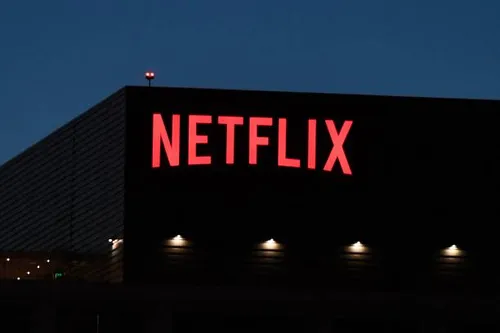

### Dataset: https://www.kaggle.com/datasets/shivamb/netflix-shows?resource=download

### Filipe Bernard - rm97830
### Gustavo Cristiano Pessoa - rm551924
### Ricardo Vergani - rm550166

#### **Importing necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#### **Loading data into DataFrame**

In [ ]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### **1. Does Netflix has more focus on TV Shows than Movies in recent years?**

In [ ]:
# Cleaning the data
df.dropna(subset=['release_year', 'type'])

# Grouping the data and creating a new DataFrame
yearly_counts = df.groupby(['release_year', 'type']).size().reset_index(name='type_with_release_year')

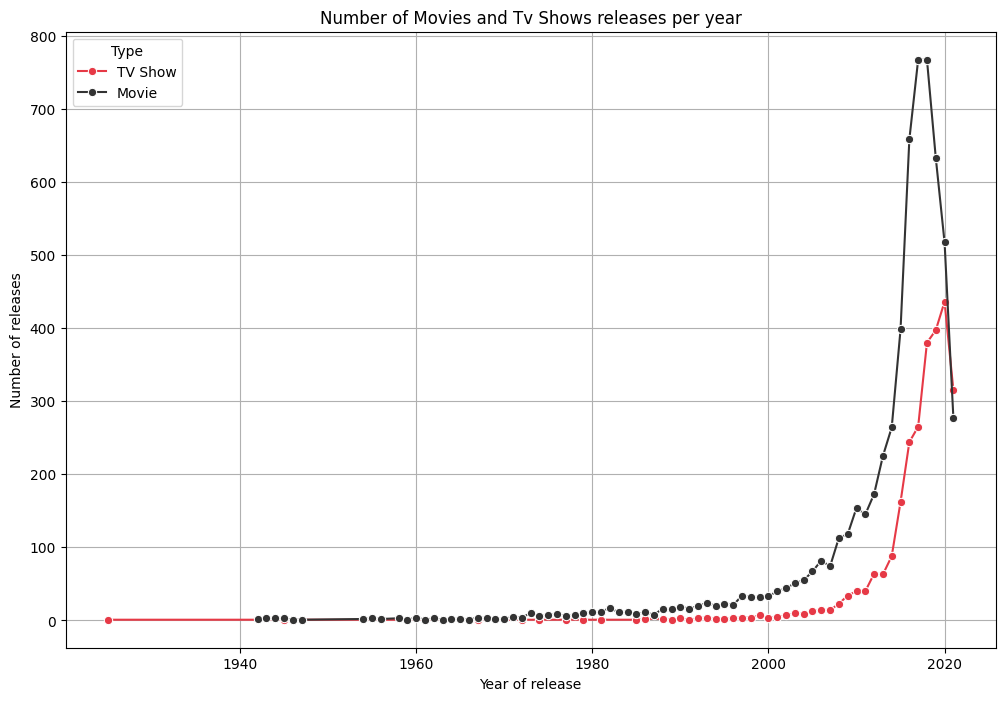

In [ ]:
# Making a customized palette
custom_palette = sns.color_palette('dark', 2)
custom_palette = ['#e63946', '#333333']

plt.figure(figsize=(12, 8))

sns.lineplot(data=yearly_counts, x='release_year', y='type_with_release_year', hue='type', marker='o', palette=custom_palette)

plt.title('Number of Movies and Tv Shows releases per year')
plt.xlabel('Year of release')
plt.ylabel('Number of releases')
plt.legend(title='Type')
plt.grid(True)

plt.show()

#### **2. Which genre appears more often in Tv Shows and Movies?**

In [ ]:
# Cleaning the data
df = df.dropna(subset=['listed_in'])

# Splitting the 'listed_in' column into multiple genres
df['genres'] = df['listed_in'].str.split(', ')

# Explode the list of genres into separate lines
df_exploded = df.explode('genres')

# Count the frequency of each genre by type
genre_counts = df_exploded.groupby(['type', 'genres']).size().reset_index(name='count')

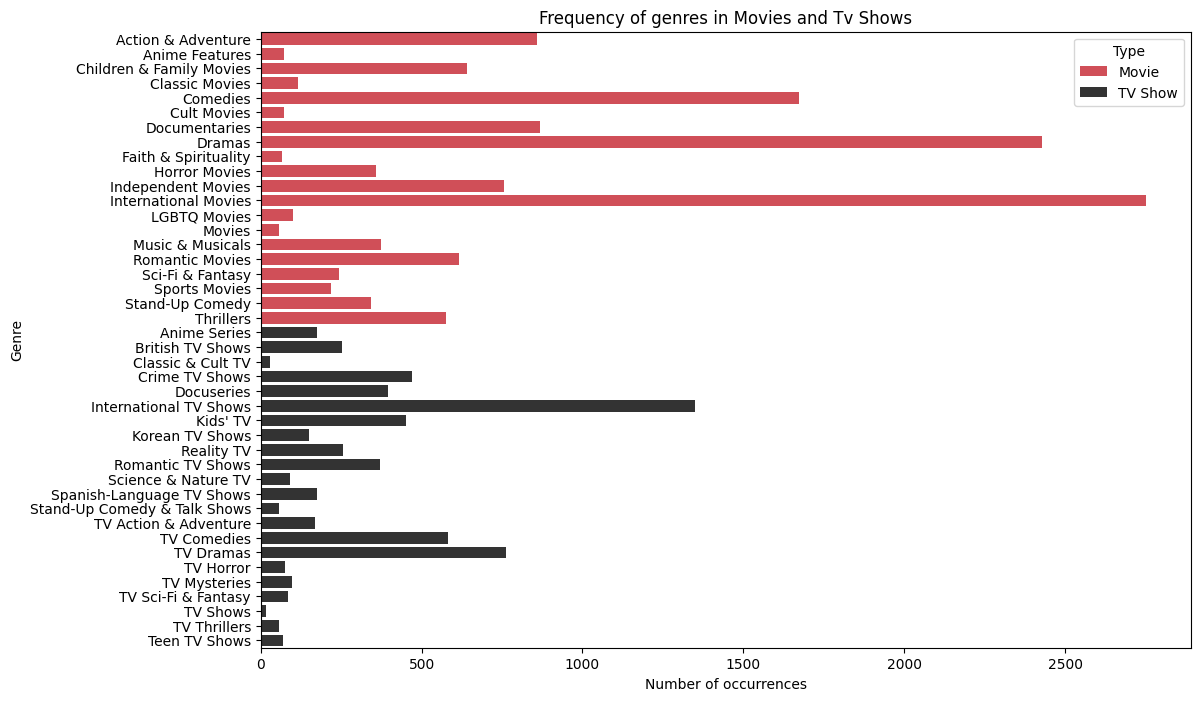

In [ ]:
plt.figure(figsize=(12, 8))

sns.barplot(data=genre_counts, x='count', y='genres', hue='type', palette=custom_palette)

plt.title('Frequency of genres in Movies and Tv Shows')
plt.xlabel('Number of occurrences')
plt.ylabel('Genre')
plt.legend(title='Type')

plt.show()

#### **3. What is the average duration of Movies?**

In [ ]:
# Separating the data
movies_duration = df[df['type'] == 'Movie']['duration'].str.replace(' min', '').astype(float)
movies_min = movies_duration.min()
movies_mean = movies_duration.mean()
movies_max = movies_duration.max()

# Converting to a DataFrame
data_movies = {
    'stats': ['Shortest duration', 'Average duration', 'Longest duration'],
    'duration': [movies_min, movies_mean, movies_max]
}

df_movies = pd.DataFrame(data_movies)

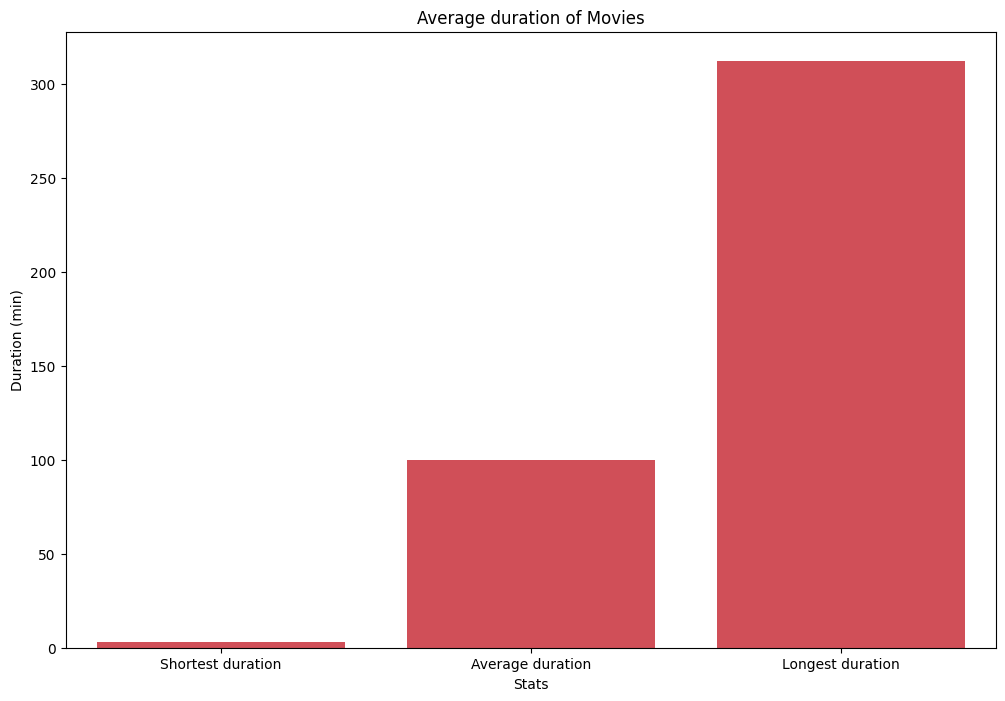

In [ ]:
plt.figure(figsize=(12, 8))

sns.barplot(data=df_movies, x='stats', y='duration', color='#e63946')

plt.title('Average duration of Movies')
plt.xlabel('Stats')
plt.ylabel('Duration (min)')

plt.show()

#### **4. What is the average duration of Tv Shows?**

In [ ]:
# Separating the data
tv_shows_duration = df[df['type'] == 'TV Show']['duration'].str.replace(' Seasons?', '', regex=True).astype(int)
tv_shows_min = tv_shows_duration.min()
tv_shows_mean = tv_shows_duration.mean()
tv_shows_max = tv_shows_duration.max()

# Converting to a DataFrame
data_tv_shows = {
    'stats': ['Shortest duration', 'Average duration', 'Longest duration'],
    'duration': [tv_shows_min, tv_shows_mean, tv_shows_max]
}

df_tv_shows = pd.DataFrame(data_tv_shows)

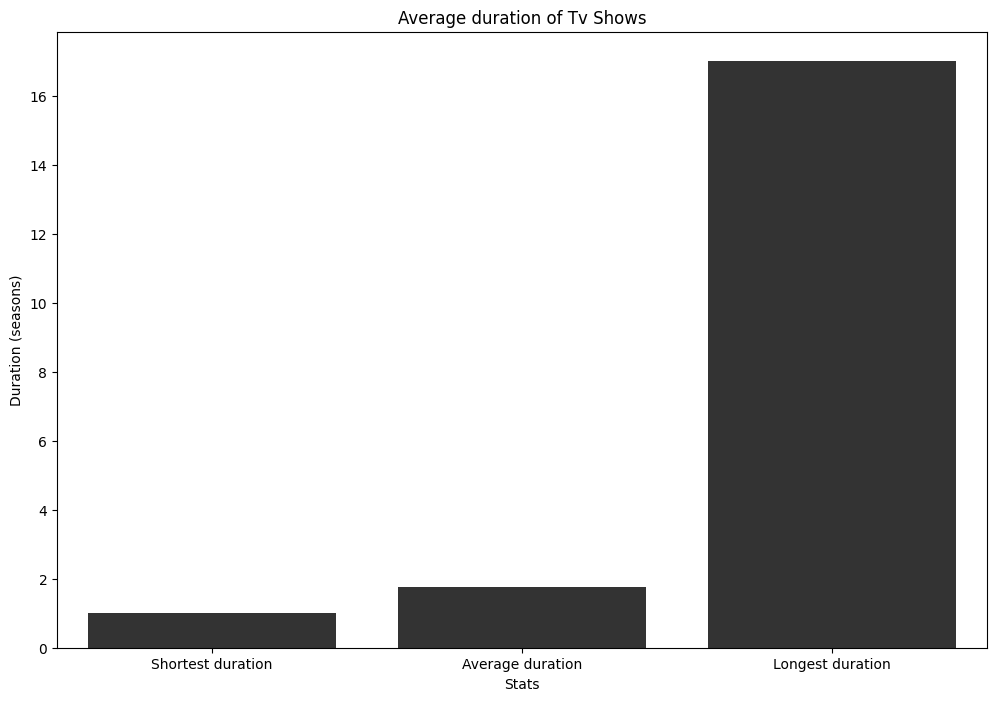

In [ ]:
plt.figure(figsize=(12, 8))

sns.barplot(data=df_tv_shows, x='stats', y='duration', color='#333333')

plt.title('Average duration of Tv Shows')
plt.xlabel('Stats')
plt.ylabel('Duration (seasons)')

plt.show()

#### **5. Who are the most frequent directors in Movies and Tv Shows?**

In [ ]:
# Cleaning the data
df_directors = df.dropna(subset=['director'])

# Converting to a DataFrame and reorganizing
most_frequent_directors = df_directors['director'].value_counts().head(10).reset_index()
most_frequent_directors.columns = ['director', 'frequency']

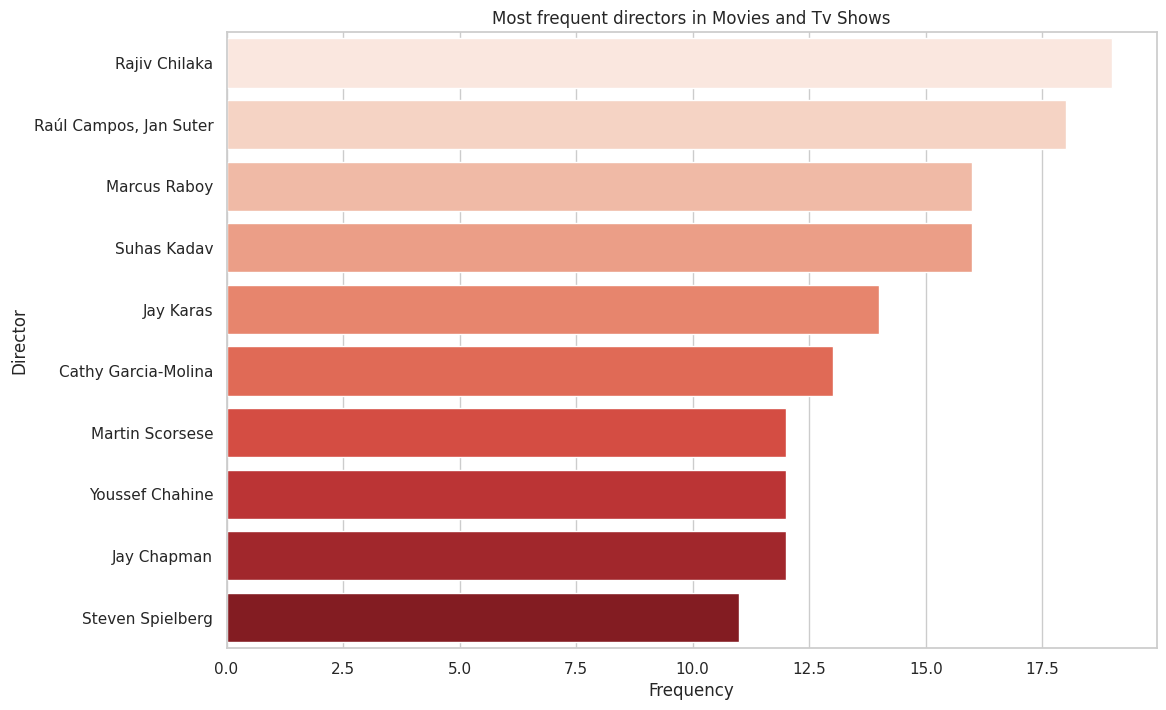

In [ ]:
plt.figure(figsize=(12, 8))

sns.barplot(data=most_frequent_directors, x='frequency', y='director', hue='director', palette='Reds')

plt.title('Most frequent directors in Movies and Tv Shows')
plt.xlabel('Frequency')
plt.ylabel('Director')

plt.show()

#### **6. Is there a growing trend in the number of Tv Shows compared to Movies over the years?**

In [ ]:
# Fitting the linear regression for Movies
movie_data = yearly_counts[yearly_counts['type'] == 'Movie']
X_movie = movie_data[['release_year']].values.reshape(-1, 1)
y_movie = movie_data['type_with_release_year'].values

model_movie = LinearRegression()
model_movie.fit(X_movie, y_movie)
movie_pred = model_movie.predict(X_movie)

# Fitting the linear regression for Tv Shows
show_data = yearly_counts[yearly_counts['type'] == 'TV Show']
X_show = show_data[['release_year']].values.reshape(-1, 1)
y_show = show_data['type_with_release_year'].values

model_show = LinearRegression()
model_show.fit(X_show, y_show)
show_pred = model_show.predict(X_show)

# Adding predictions to the data for plotting
yearly_counts['movie_pred'] = np.nan
yearly_counts['show_pred'] = np.nan
yearly_counts.loc[yearly_counts['type'] == 'Movie', 'movie_pred'] = movie_pred
yearly_counts.loc[yearly_counts['type'] == 'TV Show', 'show_pred'] = show_pred

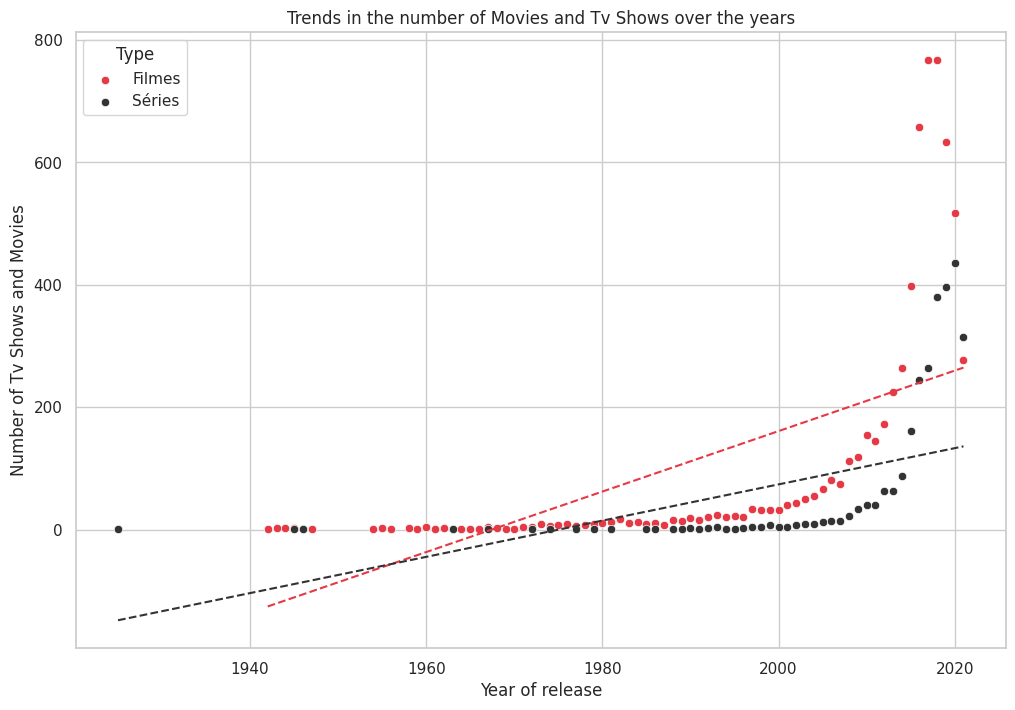

In [ ]:
plt.figure(figsize=(12, 8))

# Scatter plot and regression line for Movies
sns.scatterplot(data=yearly_counts[yearly_counts['type'] == 'Movie'], x='release_year', y='type_with_release_year', color='#e63946', label='Filmes')
sns.lineplot(data=yearly_counts[yearly_counts['type'] == 'Movie'], x='release_year', y='movie_pred', color='#e63946', linestyle='--')

# Scatter plot and regression line for Tv Shows
sns.scatterplot(data=yearly_counts[yearly_counts['type'] == 'TV Show'], x='release_year', y='type_with_release_year', color='#333333', label='Séries')
sns.lineplot(data=yearly_counts[yearly_counts['type'] == 'TV Show'], x='release_year', y='show_pred', color='#333333', linestyle='--')

plt.title('Trends in the number of Movies and Tv Shows over the years')
plt.xlabel('Year of release')
plt.ylabel('Number of Tv Shows and Movies')
plt.legend(title='Type')

plt.show()

#### **7. Who are the main actors and actresses in the productions?**

In [ ]:
# Sorting out the names of the actors and actresses and creating a list of all of them
all_cast = df['cast'].dropna().str.split(', ', expand=True).stack()

# Count the frequency of each actor
cast_counts = all_cast.value_counts()

# Converting to a DataFrame
cast_df = cast_counts.reset_index()
cast_df.columns = ['actor', 'frequency']

# Sort the DataFrame by the most frequent actors
cast_df = cast_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)

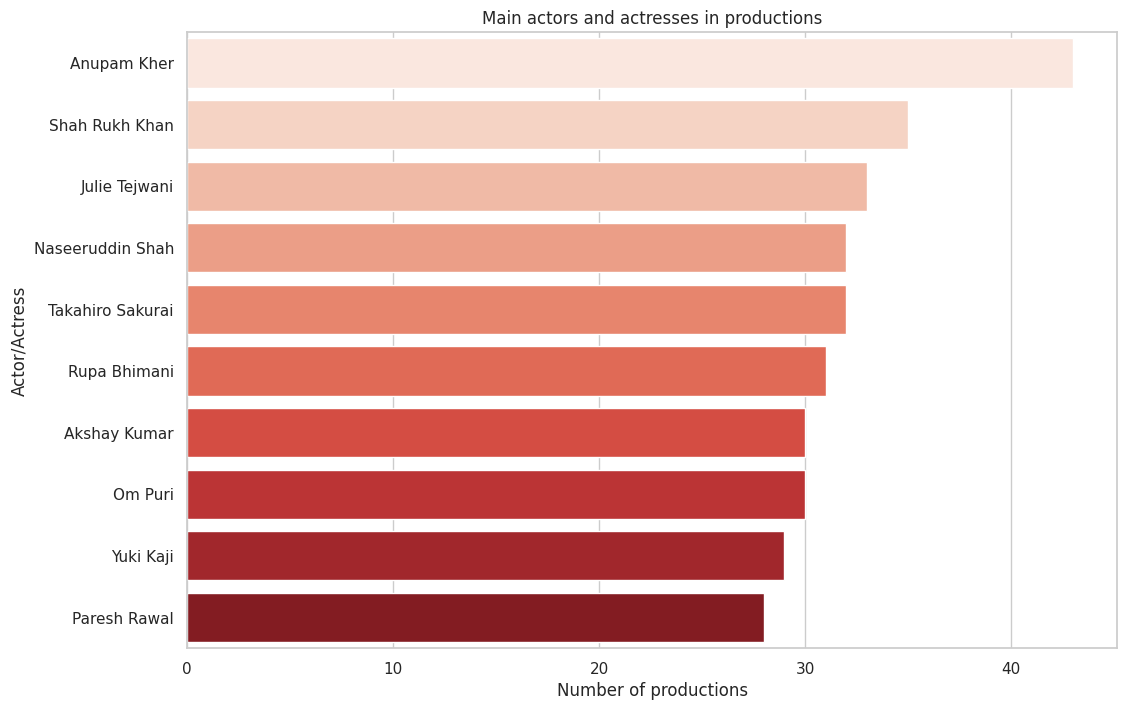

In [189]:
plt.figure(figsize=(12, 8))

sns.barplot(data=cast_df.head(10), x='frequency', y='actor', hue='actor', palette='Reds')

plt.title('Main actors and actresses in productions')
plt.xlabel('Number of productions')
plt.ylabel('Actor/Actress')

plt.show()